In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Dataset import and preparations
-Import the dataset.csv file created by the dataset_builder.py file

-Add column headers to the dataset and drop any unwanted null values from the dataset

-The number of samples for each mode of transportation is also shown below

In [2]:
data = "TMD_Datasets/dataset.csv"
dataset = pd.read_csv(data, header=None)

col_names = ['Distance','Speed', 'Acceleration', 'Avg Speed', 'STD speed', 'Max Speed', '75% percentile speed' , '50% percentile speed','Avg Acc', 'STD Acc' ,'Mode']
dataset.columns = col_names

dataset.dropna(inplace=True)

features = ['Distance','Speed', 'Acceleration', 'Avg Speed', 'STD speed', 'Max Speed', '75% percentile speed' , '50% percentile speed','Avg Acc', 'STD Acc']
classes = ['Bike','Bus', 'Subway','Car', 'Walk']

dataset['Mode'].value_counts()

Subway    22281
Car        5949
Walk       1965
Bus        1859
Bike       1307
Name: Mode, dtype: int64

## Training the model
-Dataset is divided into input and output variables represent by x and y respectively

-Dataset is then split into a training and testing subset with 70/30 split 

-Dataset is then trained using the "Decision Tree Classifier" from the Scikit-Learn library

-**Refer to the model_optimization.ipynb file to find the necessary hyper-parameter values**

-The accuracy of the model is shown in the output of the cell below

In [3]:
x = dataset.drop(['Mode'], axis=1)
y = dataset['Mode']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1234)

# Hyper-parameter values were obtained from the model_optimization.ipynb file
clf = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=22, min_samples_split=2 , min_samples_leaf=1 , min_weight_fraction_leaf=0.0 , max_features=None , random_state=1234, max_leaf_nodes=None , min_impurity_decrease=0.0 , class_weight= None , ccp_alpha=0.00075)

clf.fit(x_train, y_train)

y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

print('Model training set score: {:.4f}'.format(clf.score(x_train, y_train)))
print('Model testing set score: {:.4f}'.format(clf.score(x_test, y_test)))

Model training set score: 0.9258
Model testing set score: 0.9064


## Decision Tree visualization and statistics 
-The cells below shows a visual of the decision tree from the trained machine learning model

-Below the tree, several statistics for the decision tree including a confusion matrix for both the training and testing subsets as well as an overall classification report is also shown 

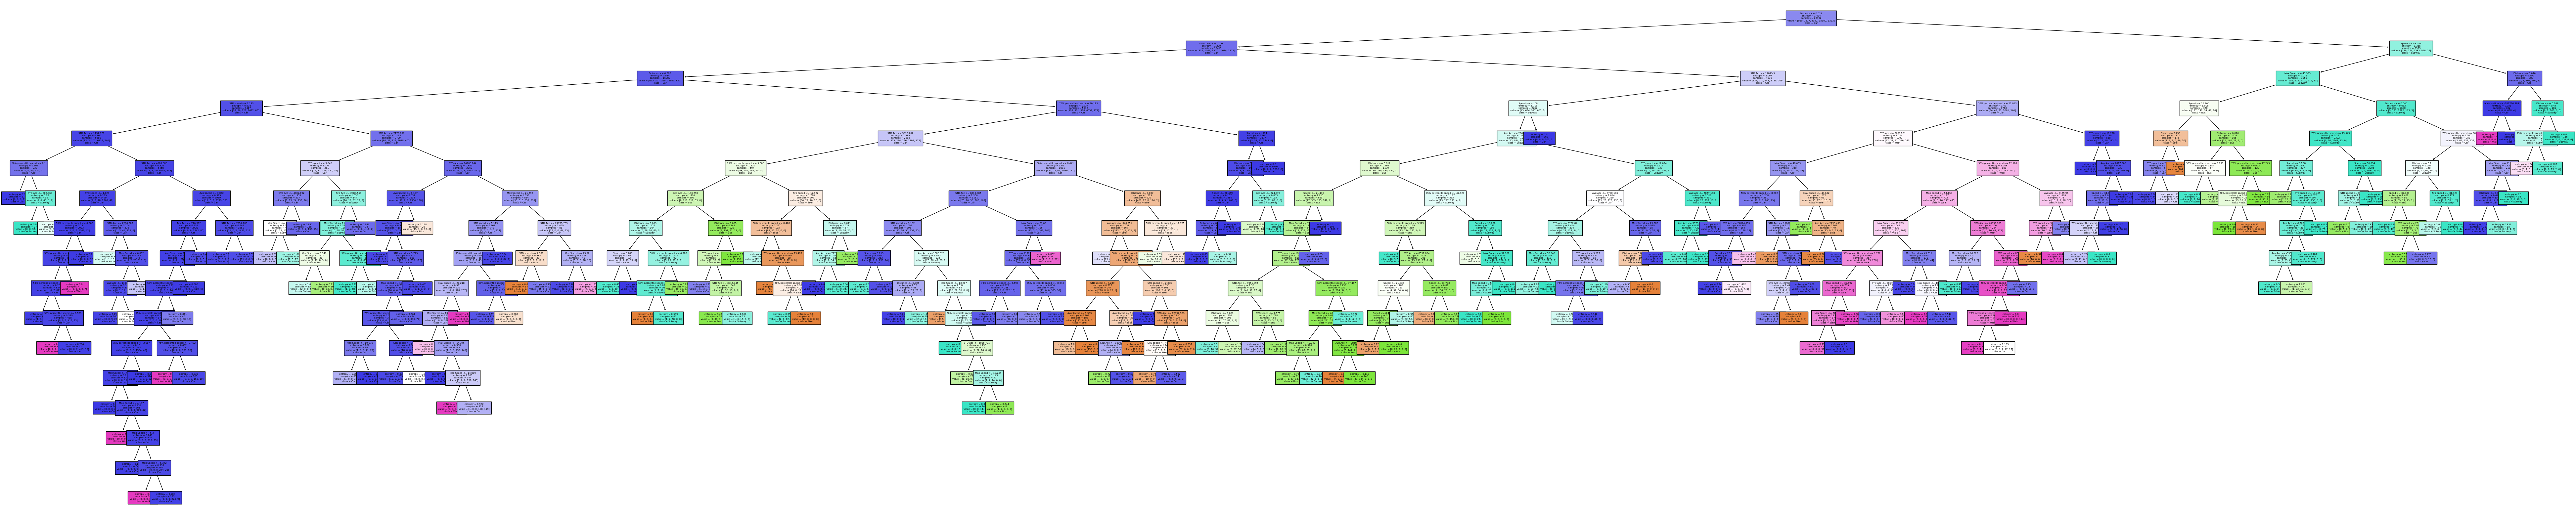

In [4]:
plt.figure(figsize=(100,20))
tree.plot_tree(clf,fontsize=5, filled=True, feature_names=features,class_names=classes) 
plt.savefig('decision_tree_visualized', dpi=300)

In [5]:
# Helper function for the confusion matrix
def plot_confusionmatrix(y_pred_train,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_pred_train,y_train, labels=classes)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Training score 0.9257879410757108
Testing score 0.9063842541712459
Train Confusion matrix


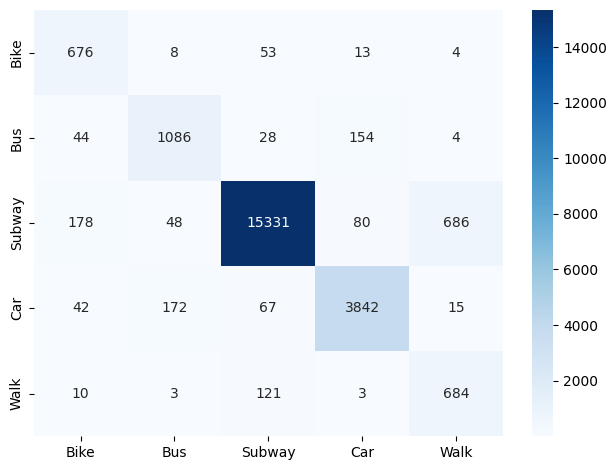

Test Confusion matrix


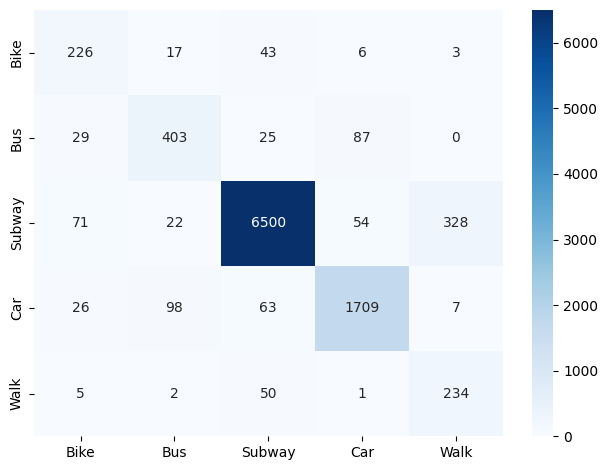

In [6]:
print(f'Training score {accuracy_score(y_pred_train,y_train)}')
print(f'Testing score {accuracy_score(y_pred_test,y_test)}')
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred_test,y_test,dom='Test')

In [7]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Bike       0.77      0.63      0.69       357
         Bus       0.74      0.74      0.74       542
         Car       0.90      0.92      0.91      1857
      Subway       0.93      0.97      0.95      6681
        Walk       0.80      0.41      0.54       572

    accuracy                           0.91     10009
   macro avg       0.83      0.74      0.77     10009
weighted avg       0.90      0.91      0.90     10009



## Saving the trained model into a file
-The pickle library is used to save the model as a python pickle file

-The model is then loaded and deployed in the "detections.py" file

In [8]:
model_name = 'finalized_model.pkl'
pickle.dump(clf, open(model_name, 'wb'))